# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-11-06 11:45:08--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.03s   

2023-11-06 11:45:08 (1.69 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
lbl = LabelEncoder()
target = lbl.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,530,88,48,90,178,60,8,175,38,21,152,200,460,198,68,13,16,192,199
1,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197
2,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
3,138,88,37,63,130,58,5,125,54,18,130,141,230,145,74,14,20,184,188
4,205,87,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
5,836,87,45,66,139,58,8,140,47,18,148,168,294,175,73,3,12,188,196
6,341,86,40,75,146,62,6,140,48,18,135,158,290,162,72,3,21,183,190
7,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
8,487,93,45,81,177,64,7,160,41,20,147,180,383,188,70,11,11,192,199
9,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.102004,93.972678,45.010929,82.402550,168.890710,61.568306,8.706740,169.564663,40.819672,20.655738,148.307832,189.438980,444.114754,175.453552,72.650273,6.336976,12.418944,188.801457,195.455373
std,241.507674,8.347449,6.223621,15.962435,33.775975,8.476318,4.925686,33.924319,7.917129,2.658801,14.643761,32.054334,180.795796,32.534150,7.647199,4.871461,8.601227,6.110802,7.463311
min,0.000000,73.000000,34.000000,42.000000,105.000000,47.000000,3.000000,114.000000,26.000000,17.000000,119.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,224.000000,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,151.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,430.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,632.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,219.000000,602.000000,199.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,38.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict



#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [31]:
col_names = ["COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO", "PRAXIS ASPECT RATIO", "MAXLENGTH ASPECT RATIO", "SCATTER RATIO", "ELONGATEDNESS", "PRAXIS RECTANGULARITY",
  "MAXLENGTH RECTANGULARITY", "SCALED VARIANCE ALONG MAJOR AXIS", "SCALED VARIANCE ALONG MINOR AXIS","SCALED RADIUS OF GYRATION", "SKEWNESS ABOUT MAJOR AXIS", "SKEWNESS ABOUT MINOR AXIS",
  "KURTOSIS ABOUT MINOR AXIS", "KURTOSIS ABOUT MAJOR AXIS", "HOLLOWS RATIO", "CLASS LABEL"]
for i in range(19):
  X_train_pd = X_train_pd.rename(columns={i: f'{col_names[i]}'})
X_train_pd.head(10)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS LABEL
0,530,88,48,90,178,60,8,175,38,21,152,200,460,198,68,13,16,192,199
1,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197
2,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
3,138,88,37,63,130,58,5,125,54,18,130,141,230,145,74,14,20,184,188
4,205,87,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
5,836,87,45,66,139,58,8,140,47,18,148,168,294,175,73,3,12,188,196
6,341,86,40,75,146,62,6,140,48,18,135,158,290,162,72,3,21,183,190
7,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
8,487,93,45,81,177,64,7,160,41,20,147,180,383,188,70,11,11,192,199
9,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print(X_trained_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(549, 19)
(297, 19)
(549,)
(297,)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [34]:
# создадим объект класса LogisticRegression и запишем его в переменную model
model = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, max_iter=500)

# обучим нашу модель
# model.fit(X_trained_scaled, y_train)
# y_pred = model.predict(X_trained_scaled)



In [35]:

y_pred = cross_val_predict(model, X_trained_scaled, y_train, cv=10)
y_pred_test = cross_val_predict(model, X_test_scaled, y_test, cv=10)


print(f' accuracy = {accuracy_score(y_train, y_pred)}')
print(f' f1 = {f1_score(y_train, y_pred, average="weighted")}')
print(f' test_accuracy = {accuracy_score(y_test, y_pred_test)}')
print(f' f1_test = {f1_score(y_test, y_pred_test, average="weighted")}')


 accuracy = 0.7723132969034608
 f1 = 0.7682234343525787
 test_accuracy = 0.7542087542087542
 f1_test = 0.747984851585645


In [36]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_trained_scaled,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
accuracy : 0.7887205387205387


In [37]:
model = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, penalty = 'l1', C = 1.0, max_iter=500)
model.fit(X_trained_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
print(f' test_accuracy = {accuracy_score(y_test, y_pred_test)}')
print(f' f1_test = {f1_score(y_test, y_pred_test, average="weighted")}')

 test_accuracy = 0.7845117845117845
 f1_test = 0.7823745098652761


In [38]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

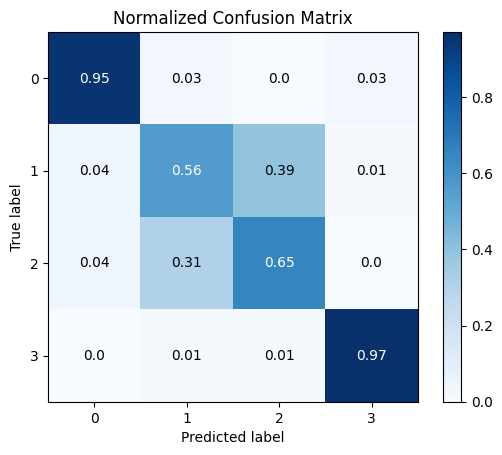

In [39]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [41]:
u, S, v = np.linalg.svd(X_trained_scaled, full_matrices=False)
total_variance = sum(S)
variance_explained = [(i/total_variance)*100 for i in sorted(S, reverse = True)]
cumulative_variance_explained = np.cumsum(variance_explained)

[]

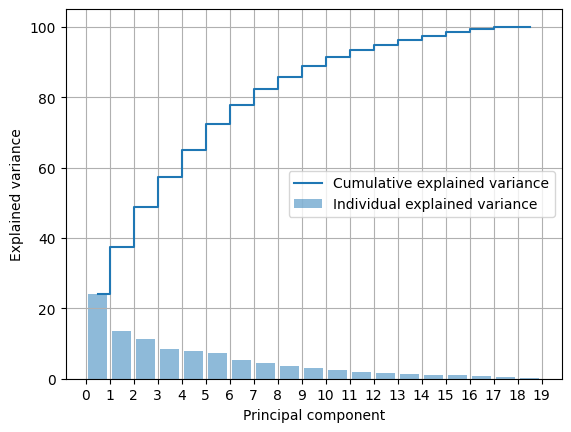

In [42]:
xs = [0.5 + i for i in range(19)]
plt.bar(xs, variance_explained, alpha=0.5, align = 'center', label="Individual explained variance")
plt.step(xs, cumulative_variance_explained, where='mid', label = 'Cumulative explained variance')
plt.ylabel("Explained variance")
plt.xlabel("Principal component")
plt.legend(loc='best')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.grid()
plt.plot()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [51]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 10)
X_sklearn_trained = sklearn_pca.fit_transform(X_trained_scaled)
X_sklearn_test = sklearn_pca.fit_transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [52]:
# создадим объект класса LogisticRegression и запишем его в переменную model
model = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, penalty = 'l1', C = 1.0, max_iter=500)

# обучим нашу модель
# model.fit(X_trained_scaled, y_train)
# y_pred = model.predict(X_trained_scaled)

y_pred = cross_val_predict(model, X_sklearn_trained, y_train, cv=10)
y_pred_test = cross_val_predict(model, X_sklearn_test, y_test, cv=10)



print(f' accuracy = {accuracy_score(y_test, y_pred_test)}')
print(f' f1 = {f1_score(y_test, y_pred_test, average="weighted")}')



 accuracy = 0.6801346801346801
 f1 = 0.6694237599247373


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Обучаем
clf = clf.fit(X_trained_scaled, y_train)

# Предсказываем
y_pred = clf.predict(X_trained_scaled)
y_pred_test = clf.predict(X_test_scaled)

print(f"Accuracy on training: {clf.score(X_trained_scaled, y_train)} ")
print(f"Accuracy on test: {clf.score(X_test_scaled, y_test)} ")

Accuracy on training: 1.0 
Accuracy on test: 0.7205387205387206 


In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
clf = clf.fit(X_trained_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy on test: {clf.score(X_test_scaled, y_test)} ")

Accuracy on test: 0.6734006734006734 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
tree_class = DecisionTreeClassifier(random_state=42,
                                    criterion='gini',
                                    # максимальная глубина дерева
                                    max_depth = 6,
                                    # минимальное число элементов в узле для разбиения
                                    min_samples_split=8,
                                    # минимальное число элементов в листе
                                    min_samples_leaf=8)

param_set = {
    'max_depth': [3,4,6],
    'min_samples_leaf': [2,4,8],
    'min_samples_split': [8,10,14]
}

grid_cv_1 = GridSearchCV(estimator = tree_class,
                         param_grid = param_set,
                         scoring = 'accuracy',
                         cv=10)
grid_cv_1.fit(X_trained_scaled,y_train)

print("tuned hyperparameters :(best parameters) ",grid_cv_1.best_params_)
print("accuracy :",grid_cv_1.best_score_)

tuned hyperparameters :(best parameters)  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8}
accuracy : 0.673939393939394


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

reg = BaggingClassifier(DecisionTreeClassifier(max_depth=5), warm_start=False)
reg.fit(X_trained_scaled, y_train)
y_pred = reg.predict(X_trained_scaled)
print(f"Accuracy on training test: {reg.score(X_trained_scaled, y_train)} ")
plt.figure(figsize=(20, 30))
sizes = [1, 3, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(sizes):
    reg.n_estimators = s
    reg.fit(X_trained_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    print(f"Accuracy on training test: {reg.score(X_trained_scaled, y_train)} ")
    print(f"Accuracy on test: {reg.score(X_test_scaled, y_test)} ")

Accuracy on training test: 0.8633879781420765 
Accuracy on training test: 0.7668488160291439 
Accuracy on test: 0.632996632996633 
Accuracy on training test: 0.819672131147541 
Accuracy on test: 0.6801346801346801 
Accuracy on training test: 0.8688524590163934 
Accuracy on test: 0.6902356902356902 
Accuracy on training test: 0.8870673952641166 
Accuracy on test: 0.7138047138047138 
Accuracy on training test: 0.8888888888888888 
Accuracy on test: 0.7070707070707071 
Accuracy on training test: 0.8925318761384335 
Accuracy on test: 0.7104377104377104 
Accuracy on training test: 0.8998178506375227 
Accuracy on test: 0.7104377104377104 
Accuracy on training test: 0.8888888888888888 
Accuracy on test: 0.7070707070707071 


<Figure size 2000x3000 with 0 Axes>

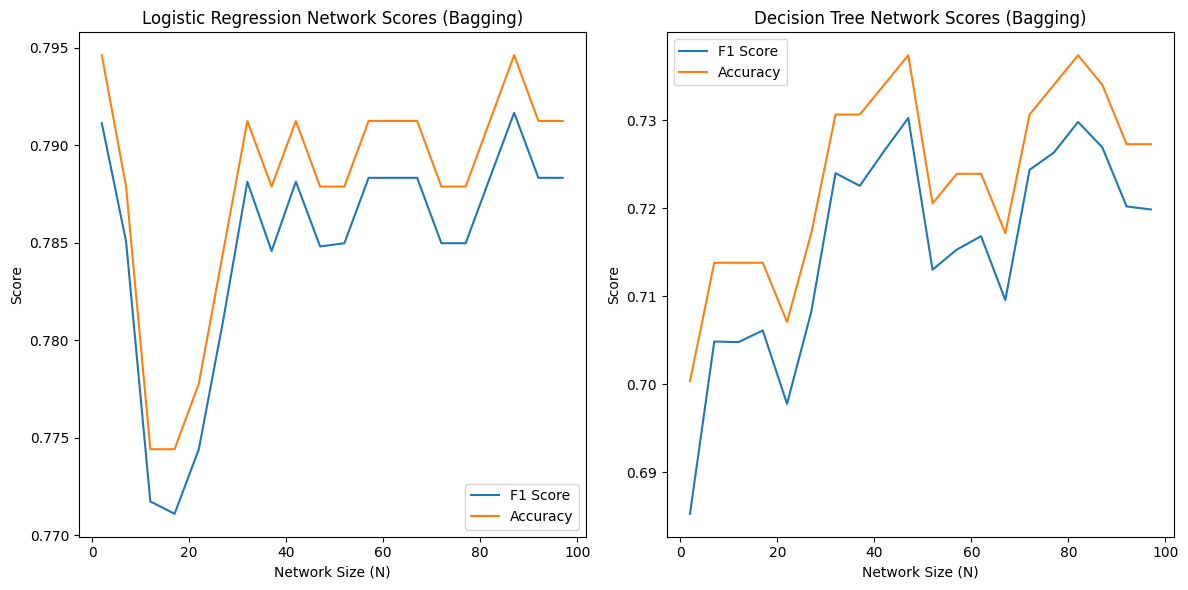

In [54]:
Nmin = 2
Nmax = 100
step = 5

network_len = list(range(Nmin, Nmax + 1, step))
f1_scores_log = []
accuracy_scores_log = []
f1_sc_tree = []
accuracy_sc_tree = []

for number in network_len:
    # Logistic Regressions
    logist = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, penalty = 'l1', C = 1.0, max_iter=500)
    logist_multi = BaggingClassifier(estimator=logist, n_estimators=number, random_state=42)
    logist_multi.fit(X_trained_scaled, y_train)
    logist_multi_forecast = logist_multi.predict(X_test_scaled)
    f1_scores_log.append(f1_score(y_test, logist_multi_forecast, average="weighted"))
    accuracy_scores_log.append(accuracy_score(y_test, logist_multi_forecast))

    # Decision Trees
    tree = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 8)
    tree_multi = BaggingClassifier(estimator=tree, n_estimators=number, random_state=42)
    tree_multi.fit(X_trained_scaled, y_train)
    tree_multi_forecast = tree_multi.predict(X_test_scaled)
    f1_sc_tree.append(f1_score(y_test, tree_multi_forecast, average="weighted"))
    accuracy_sc_tree.append(accuracy_score(y_test, tree_multi_forecast))

# Plot F1 and accuracy scores for Logistic Regression Ensemble
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(network_len, f1_scores_log, label='F1 Score')
plt.plot(network_len, accuracy_scores_log, label='Accuracy')
plt.xlabel('Network Size (N)')
plt.ylabel('Score')
plt.title('Logistic Regression Network Scores (Bagging)')
plt.legend()

# Plot F1 and accuracy scores for Decision Tree Ensemble
plt.subplot(1, 2, 2)
plt.plot(network_len, f1_sc_tree, label='F1 Score')
plt.plot(network_len, accuracy_sc_tree, label='Accuracy')
plt.xlabel('Network Size (N)')
plt.ylabel('Score')
plt.title('Decision Tree Network Scores (Bagging)')
plt.legend()

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

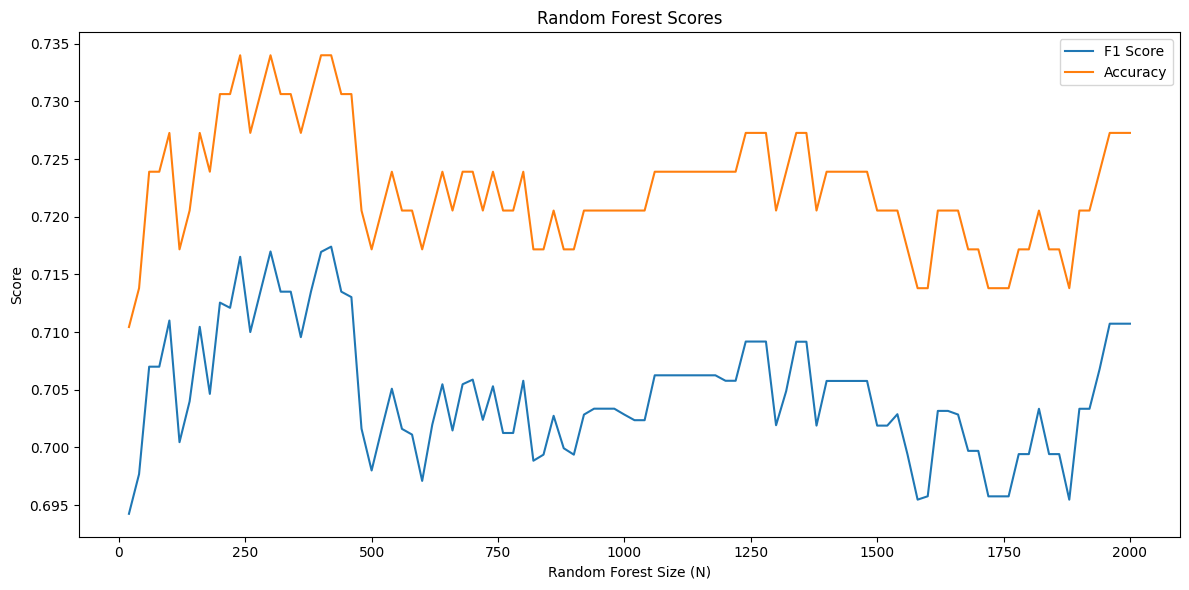

In [55]:
from sklearn.ensemble import RandomForestClassifier

Nmin = 20
Nmax = 2000
step = 20

random_forest_len = list(range(Nmin, Nmax + 1, step))
f1_scores_forest = []
accuracy_scores_forest = []


for number in random_forest_len:
    # Random_Forest
    random_forest = RandomForestClassifier(criterion='gini', n_estimators = number, max_depth = 6, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
    random_forest.fit(X_trained_scaled, y_train)
    random_forest_forecast = random_forest.predict(X_test_scaled)
    f1_scores_forest.append(f1_score(y_test, random_forest_forecast, average="weighted"))
    accuracy_scores_forest.append(accuracy_score(y_test, random_forest_forecast))

# Plot F1 and accuracy scores for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(random_forest_len, f1_scores_forest, label='F1 Score')
plt.plot(random_forest_len, accuracy_scores_forest, label='Accuracy')
plt.xlabel('Random Forest Size (N)')
plt.ylabel('Score')
plt.title('Random Forest Scores')
plt.legend()

plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [56]:
X_trained_scaled = scaler.fit_transform(X_train)
print(y_train[:55].shape)
print(X_trained_scaled.shape)

(55,)
(549, 19)


[0.6180783870741524, 0.6668117892049192, 0.6691846838266421, 0.7169079948730274, 0.756920100411502, 0.7782125434634286, 0.7678530953839279, 0.7772968547948991, 0.7812007651404225, 0.7883274353512449]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


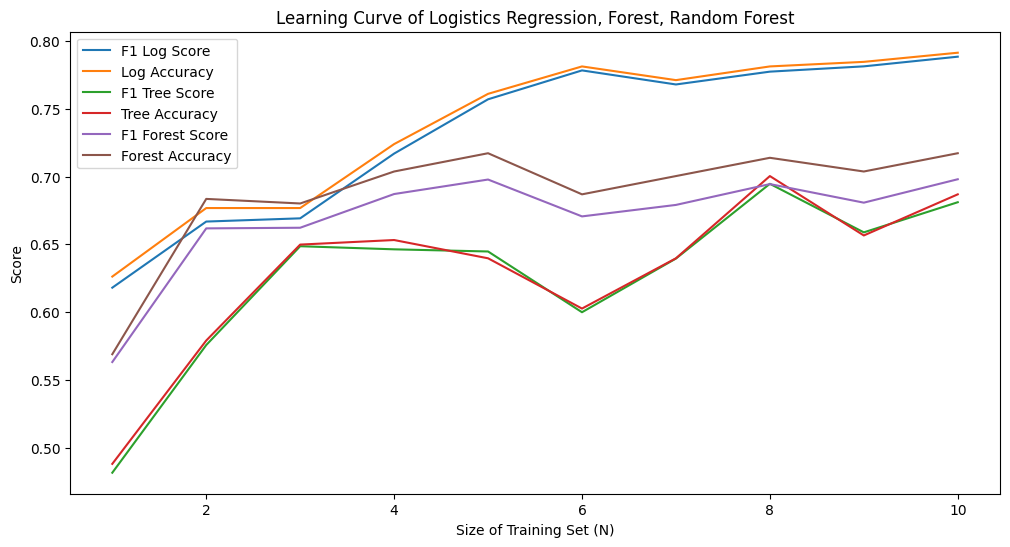

In [57]:
f1_log = []
accuracy_log = []
f1_tree = []
accuracy_tree = []
f1_forest = []
accuracy_forest = []

for i in range(55,len(X_trained_scaled),55):
  X_changing_sample = X_trained_scaled[:i,:]
  Y_changing_sample = y_train[:i]

  # Logistic Regressions
  logist = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, penalty = 'l1', C = 1.0, max_iter=500)
  logist.fit(X_changing_sample, Y_changing_sample)
  logist_forecast = logist.predict(X_test_scaled)
  f1_log.append(f1_score(y_test, logist_forecast, average="weighted"))
  accuracy_log.append(accuracy_score(y_test, logist_forecast))

  # Decision Trees
  tree = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 8)
  tree.fit(X_changing_sample, Y_changing_sample)
  tree_forecast = tree.predict(X_test_scaled)
  f1_tree.append(f1_score(y_test, tree_forecast, average="weighted"))
  accuracy_tree.append(accuracy_score(y_test, tree_forecast))

  # Random forest
  random_forest = RandomForestClassifier(criterion='gini', n_estimators = 500, max_depth = 6, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
  random_forest.fit(X_changing_sample, Y_changing_sample)
  random_forest_forecast = random_forest.predict(X_test_scaled)
  f1_forest.append(f1_score(y_test, random_forest_forecast, average="weighted"))
  accuracy_forest.append(accuracy_score(y_test, random_forest_forecast))

# Добавляем всю выборку
# Logistic Regressions
logist = LogisticRegression(multi_class = 'multinomial', solver='saga', tol=1e-3, penalty = 'l1', C = 1.0, max_iter=500)
logist.fit(X_trained_scaled, y_train)
logist_forecast = logist_multi.predict(X_test_scaled)
f1_log.append(f1_score(y_test, logist_forecast, average="weighted"))
accuracy_log.append(accuracy_score(y_test, logist_forecast))

# Decision Trees
tree = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 8)
tree.fit(X_trained_scaled, y_train)
tree_forecast = tree.predict(X_test_scaled)
f1_tree.append(f1_score(y_test, tree_forecast, average="weighted"))
accuracy_tree.append(accuracy_score(y_test, tree_forecast))

# Random forest
random_forest = RandomForestClassifier(criterion='gini', n_estimators = 500, max_depth = 6, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
random_forest.fit(X_trained_scaled, y_train)
random_forest_forecast = random_forest.predict(X_test_scaled)
f1_forest.append(f1_score(y_test, random_forest_forecast, average="weighted"))
accuracy_forest.append(accuracy_score(y_test, random_forest_forecast))

# Plot F1 and accuracy scores for Logistic Regression Ensemble
plt.figure(figsize=(12, 6))
print(f1_log)
print([i for i in range(1,11,1)])
plt.plot([i for i in range(1,11,1)], f1_log, label='F1 Log Score')
plt.plot([i for i in range(1,11,1)], accuracy_log, label='Log Accuracy')
plt.plot([i for i in range(1,11,1)], f1_tree, label='F1 Tree Score')
plt.plot([i for i in range(1,11,1)], accuracy_tree, label='Tree Accuracy')
plt.plot([i for i in range(1,11,1)], f1_forest, label='F1 Forest Score')
plt.plot([i for i in range(1,11,1)], accuracy_forest, label='Forest Accuracy')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Score')
plt.title('Learning Curve of Logistics Regression, Forest, Random Forest')
plt.legend()
